In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv("s1.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
494,1,CASH_IN,100198.77,C1348115836,7865071.90,7965270.68,C1750905143,336837.78,424250.45,0,0
495,1,CASH_IN,160347.32,C1972143064,7965270.68,8125617.99,C33524623,724867.22,1517262.16,0,0
496,1,CASH_IN,289272.75,C312168418,8125617.99,8414890.75,C75457651,413976.60,31469.78,0,0
497,1,CASH_IN,63189.26,C95369743,8414890.75,8478080.00,C1860513229,101925.00,0.00,0,0


In [2]:
df.shape

(499, 11)

In [3]:
df.shape


(499, 11)

In [4]:
df.info()
df=df.drop(['step'],axis='columns')
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            499 non-null    int64  
 1   type            499 non-null    object 
 2   amount          499 non-null    float64
 3   nameOrig        499 non-null    object 
 4   oldbalanceOrg   499 non-null    float64
 5   newbalanceOrig  499 non-null    float64
 6   nameDest        499 non-null    object 
 7   oldbalanceDest  499 non-null    float64
 8   newbalanceDest  499 non-null    float64
 9   isFraud         499 non-null    int64  
 10  isFlaggedFraud  499 non-null    int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 43.0+ KB


,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
494,CASH_IN,100198.77,C1348115836,7865071.90,7965270.68,C1750905143,336837.78,424250.45,0,0
495,CASH_IN,160347.32,C1972143064,7965270.68,8125617.99,C33524623,724867.22,1517262.16,0,0
496,CASH_IN,289272.75,C312168418,8125617.99,8414890.75,C75457651,413976.60,31469.78,0,0
497,CASH_IN,63189.26,C95369743,8414890.75,8478080.00,C1860513229,101925.00,0.00,0,0


In [5]:
feature_data=df[['amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest']]

#feature_data=df[['amount', 'newbalanceOrig']]
#independent variable
x=np.asarray(feature_data)
#dependent variable
y=np.asarray(df['isFraud'])
from sklearn.preprocessing import MinMaxScaler, normalize
#from sklearn.preprocessing import StandardScaler, normalize
ms = MinMaxScaler()

x = ms.fit_transform(x)

#X_normalized = normalize(x)
x=pd.DataFrame(x)
x

,0,1,2,3,4
0,0.003862,0.019730,0.018478,0.000000,0.000000
1,0.000729,0.002464,0.002235,0.000000,0.000000
2,0.000068,0.000021,0.000000,0.000000,0.000000
3,0.000068,0.000021,0.000000,0.001246,0.000000
4,0.004580,0.004819,0.003445,0.000000,0.000000
...,...,...,...,...,...
494,0.039360,0.912088,0.918207,0.019814,0.022096
495,0.062990,0.923708,0.936692,0.042639,0.079024
496,0.113639,0.942303,0.970038,0.024352,0.001639
497,0.024821,0.975849,0.977322,0.005996,0.000000


In [6]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster

AgglomerativeClustering(affinity='euclidean')

In [7]:
cluster.fit(x)

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [8]:
y_pred=cluster.fit_predict(df[['amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest']])
y_pred

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
df['cluster']=y_pred
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,cluster
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


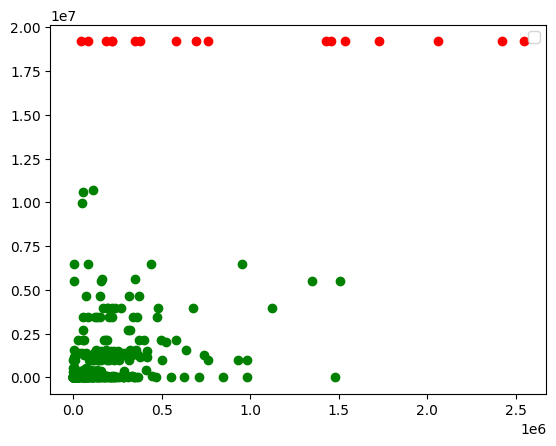

In [10]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.amount,df1['newbalanceDest'], color='green')
plt.scatter(df2.amount,df2['newbalanceDest'], color='red')
plt.scatter(df3.amount,df3['newbalanceDest'],color='black')

plt.legend()